12


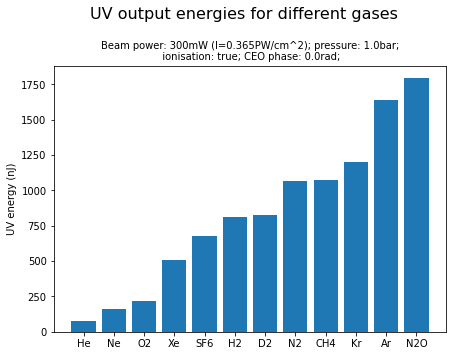

(12,)

In [40]:
import numpy as np
import os 
import matplotlib.pyplot as plt 

N =len(os.listdir("."))
gas_arr = np.array([])
E_out_arr = np.array([])
dir_arr = np.array([])

# get data 
for i in np.arange(N):

    dir = os.listdir(".")[i]

    if os.path.isdir(dir):
        params = np.loadtxt(os.path.join(dir,"params.txt"),dtype="str", delimiter="=", comments="#")
        gas  = (params[0,1])[1:]
        E_out = params[13,1]

        gas_arr = np.append(gas_arr, gas)
        E_out_arr = np.append(E_out_arr, float(E_out))
        dir_arr = np.append(dir_arr, os.path.join(".",dir))

print(len(dir_arr))

spec_arr = np.empty(len(dir_arr), dtype="object")   

for j in np.arange(len(dir_arr)):
    
    spectrum = np.loadtxt(os.path.join(dir_arr[j], "UV_spectrum.txt"))
    spec_arr[j] = spectrum

# sort arrays
gas_arr = gas_arr[E_out_arr.argsort()]
spec_arr = spec_arr[E_out_arr.argsort()]
E_out_arr = E_out_arr[E_out_arr.argsort()]

plt.figure(figsize=[7.04, 5.28])
plt.suptitle("UV output energies for different gases", fontsize=16)
plt.subplots_adjust(top=0.825)
plt.title("Beam power: 300mW (I=0.365PW/cm^2); pressure: 1.0bar;\n  ionisation: true; CEO phase: 0.0rad; ",fontsize=10)
plt.bar(gas_arr, E_out_arr*1e9)
plt.ylabel("UV energy (nJ)")

plt.savefig("UV_energies.png",dpi=1000)
plt.show()

plt.figure(figsize=[7.04, 5.28])
